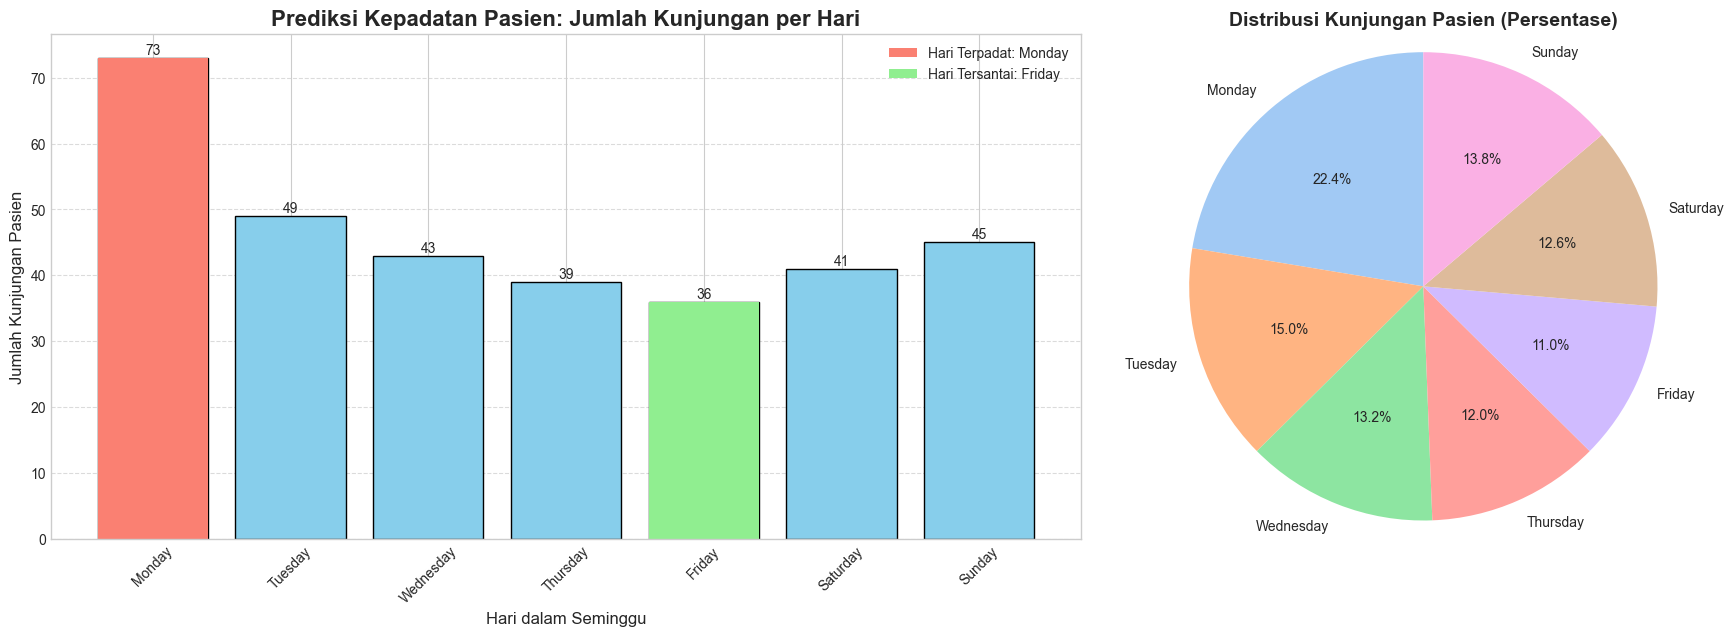


--- Analisis Prediksi Kepadatan Pasien ---
Total Data Pasien: 328 entri
-----------------------------------
Jumlah Kunjungan Pasien per Hari:
Hari Masuk
Monday       73
Tuesday      49
Wednesday    43
Thursday     39
Friday       36
Saturday     41
Sunday       45
-----------------------------------
Hari TERPADAT diprediksi adalah: Monday dengan 73 kunjungan.
Hari TERSANTAI diprediksi adalah: Friday dengan 36 kunjungan.
-----------------------------------
Rekomendasi untuk Manajemen RS:
- Alokasikan staf dan sumber daya tambahan pada hari Monday untuk mengantisipasi lonjakan pasien.
- Pertimbangkan untuk menjadwalkan tugas non-prioritas atau pelatihan staf pada hari Friday saat kunjungan lebih sedikit.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah nama file di sini jika berbeda
file_path = 'rekap klaim jul.xlsx'

# Menggunakan pd.read_excel untuk membaca file Excel
# sheet_name='sheet1' menunjukkan nama sheet yang digunakan
# header=3 menunjukkan bahwa baris keempat (indeks 3) adalah header kolom
try:
    df = pd.read_excel(file_path, sheet_name='sheet1', header=3)
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Pastikan file berada di folder yang sama.")
    exit()

# Drop any rows that are entirely empty or have unnecessary columns
df = df.dropna(how='all')
df = df.dropna(axis=1, how='all')

# Clean up column names by removing leading/trailing spaces
df.columns = df.columns.str.strip()

# Convert 'Tgl. Masuk' to datetime objects
df['Tgl. Masuk'] = pd.to_datetime(df['Tgl. Masuk'], format='%d %b %Y')

# Create a 'day of week' column from 'Tgl. Masuk'
df['Hari Masuk'] = df['Tgl. Masuk'].dt.day_name()

# Count the number of visits for each day of the week
visit_counts = df['Hari Masuk'].value_counts()
visit_counts = visit_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Dashboard Visualization
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [2, 1]})

# --- Left Plot: Bar Chart for Visits by Day ---
ax1.bar(visit_counts.index, visit_counts.values, color='skyblue', edgecolor='black')
ax1.set_title('Prediksi Kepadatan Pasien: Jumlah Kunjungan per Hari', fontsize=16, fontweight='bold')
ax1.set_xlabel('Hari dalam Seminggu', fontsize=12)
ax1.set_ylabel('Jumlah Kunjungan Pasien', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for i, count in enumerate(visit_counts.values):
    ax1.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

# Highlight the busiest and least busy days
busiest_day = visit_counts.idxmax()
least_busy_day = visit_counts.idxmin()
ax1.bar(busiest_day, visit_counts[busiest_day], color='salmon', label=f'Hari Terpadat: {busiest_day}')
ax1.bar(least_busy_day, visit_counts[least_busy_day], color='lightgreen', label=f'Hari Tersantai: {least_busy_day}')

ax1.legend()

# --- Right Plot: Pie Chart for Visit Distribution ---
ax2.pie(visit_counts.values, labels=visit_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax2.set_title('Distribusi Kunjungan Pasien (Persentase)', fontsize=14, fontweight='bold')
ax2.axis('equal')

plt.tight_layout(pad=3.0)
plt.show()

# Print a summary report
print("\n--- Analisis Prediksi Kepadatan Pasien ---")
print(f"Total Data Pasien: {len(df)} entri")
print("-" * 35)
print("Jumlah Kunjungan Pasien per Hari:")
print(visit_counts.to_string())
print("-" * 35)
print(f"Hari TERPADAT diprediksi adalah: {busiest_day} dengan {visit_counts[busiest_day]} kunjungan.")
print(f"Hari TERSANTAI diprediksi adalah: {least_busy_day} dengan {visit_counts[least_busy_day]} kunjungan.")
print("-" * 35)
print("Rekomendasi untuk Manajemen RS:")
print(f"- Alokasikan staf dan sumber daya tambahan pada hari {busiest_day} untuk mengantisipasi lonjakan pasien.")
print(f"- Pertimbangkan untuk menjadwalkan tugas non-prioritas atau pelatihan staf pada hari {least_busy_day} saat kunjungan lebih sedikit.")